## Coning for point-clouds

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from gudhi import plot_persistence_diagram
from gudhi.datasets.generators import points

from local_homology import build_local_complex, get_persistence
from local_homology.coning import is_point_in_ball

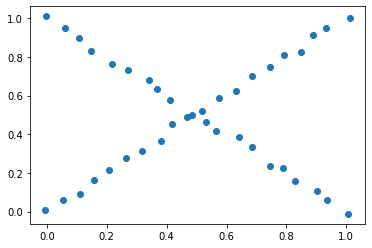

In [2]:
t = np.linspace(0, 1, 20)
X = np.stack([t, t], axis=1)
X = np.concatenate([X, np.stack([t, -t+1], axis=1)], axis=0)
X += 0.01*np.random.randn(X.shape[0], 2)

n_points = X.shape[0]

plt.scatter(X[:, 0], X[:, 1])

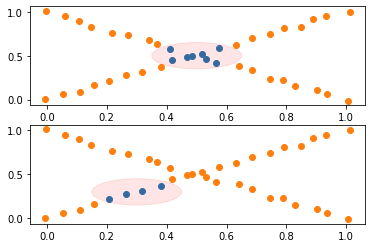

In [3]:
point0 = np.array([[0.5, 0.5]])
point1 = np.array([[0.3, 0.3]])
epsilon = 0.15

fig, axes = plt.subplots(2, 1)
for point, ax in zip([point0, point1], axes):
    is_in_ball, distance_to_boundary = is_point_in_ball(X, point,
                                                        epsilon, return_distances=True)
    ax.scatter(X[is_in_ball, 0], X[is_in_ball, 1])
    ax.scatter(X[np.logical_not(is_in_ball), 0], X[np.logical_not(is_in_ball), 1])
    neighborhood = plt.Circle(point[0], epsilon, alpha=0.1, color='r')
    #ax = plt.gca()
    ax.add_patch(neighborhood)


In [4]:
st0 = build_local_complex(X, point0, epsilon, [0, 1, 2])
pd0 = get_persistence(st0, [0, 1])
pd0

[(1, (0.06189086006918945, 0.11502381778278171)),
 (1, (0.0874568238109657, 0.1211740814963721)),
 (1, (0.10274317035111157, 0.11606812763178015)),
 (0, (0.0, 0.05909896487253027)),
 (0, (0.0, 0.05716943897682845)),
 (0, (0.0, 0.054900806879300934)),
 (0, (0.0, 0.04508904917251699)),
 (0, (0.0, 0.041166867862419965)),
 (0, (0.0, 0.0340252468405967)),
 (0, (0.0, 0.03372206170706184)),
 (0, (0.0, 0.019970329989196664))]

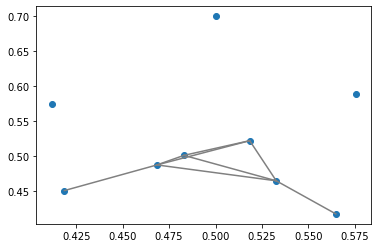

In [5]:
value = 0.075
simplices = [simplex
             for simplex, simplex_v in st0.get_filtration() if (simplex_v <= value)&(len(simplex)==2)]
simplices

is_in_ball = is_point_in_ball(X, point0, epsilon, return_distances=False)
X_local = X[is_in_ball]
X_augmented = np.concatenate([X_local, np.array([[0.5, 0.7]])], axis=0)
plt.scatter(X_augmented[:, 0], X_augmented[:, 1])
star_vertex = X_local.shape[0]

for simplex in simplices:
    if simplex[1]!=star_vertex:
        i_a, i_b = simplex
        plt.plot([X_local[i_a][0], X_local[i_b][0]],
                 [X_local[i_a][1], X_local[i_b][1]], c='grey')

In [6]:
st1 = build_local_complex(X, point1, epsilon, [0, 1, 2])
pd1 = get_persistence(st1, [0, 1])
pd1

[(1, (0.08307602929499698, 0.12751479737858593)),
 (0, (0.0, 0.08211743015462607)),
 (0, (0.0, 0.06580202841600603)),
 (0, (0.0, 0.04542141518169836)),
 (0, (0.0, 0.02438729912080484))]

### Sphere

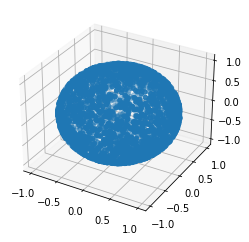

In [7]:
X = points.sphere(n_samples=3000, ambient_dim=3, radius=1, sample="random")

ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:, 1], X[:, 2],)

In [8]:
x, y = 0.1, 0.1
point = np.array([[x, y, np.sqrt(1- x**2 + y**2) ]])
epsilon = 0.25

st_sphere = build_local_complex(X, point, epsilon, dimensions=[0, 1, 2])
pd = get_persistence(st_sphere, [0, 1, 2])

In [9]:
pd

[(2, (0.14052573761291703, 0.1745984625666476)),
 (1, (0.05155455794170172, 0.10307600895017681)),
 (1, (0.07419696430644254, 0.12118592127438613)),
 (1, (0.07448251701179105, 0.11984875979594185)),
 (1, (0.06666418170229436, 0.0992315632618295)),
 (1, (0.06121120130444609, 0.09338678285046577)),
 (1, (0.06906861490746213, 0.09842090603338167)),
 (1, (0.054442662042048784, 0.0800199409666272)),
 (1, (0.08634243920322535, 0.10510719311082015)),
 (1, (0.06623628869335105, 0.08171932931907347)),
 (1, (0.058471856308500214, 0.07276553104539832)),
 (1, (0.06657159659150134, 0.07619769526527909)),
 (1, (0.06246089691392234, 0.06879531507369327)),
 (1, (0.06285552634568713, 0.06612422821181609)),
 (0, (0.0, 0.06463990675038392)),
 (0, (0.0, 0.06366923434272437)),
 (0, (0.0, 0.06351014478694142)),
 (0, (0.0, 0.05438438046829913)),
 (0, (0.0, 0.05377499107773717)),
 (0, (0.0, 0.05238560786197204)),
 (0, (0.0, 0.051006080844382996)),
 (0, (0.0, 0.050738679193753106)),
 (0, (0.0, 0.04983991626122

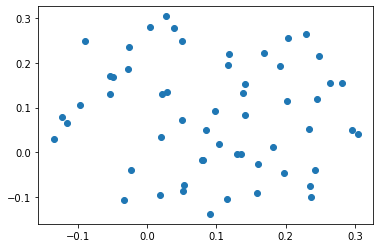

In [10]:
is_in_ball, _ = is_point_in_ball(X, point, epsilon)
x_l = X[is_in_ball]
_ = plt.scatter(x_l[:,0], x_l[:,1])

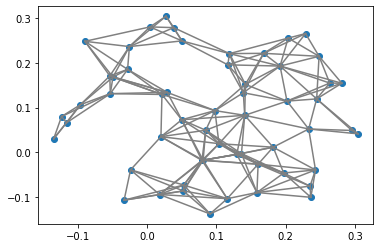

In [11]:
value = 0.1
simplices = [simplex
             for simplex, simplex_v in st_sphere.get_filtration() if (simplex_v <= value)&(len(simplex)==2)]
simplices

is_in_ball = is_point_in_ball(X, point, epsilon, return_distances=False)
X_local = X[is_in_ball]

plt.scatter(X_local[:, 0], X_local[:, 1])
star_vertex = X_local.shape[0]

for simplex in simplices:
    if simplex[1]!=star_vertex:
        i_a, i_b = simplex
        plt.plot([X_local[i_a][0], X_local[i_b][0]],
                 [X_local[i_a][1], X_local[i_b][1]], c='grey')

### Torus

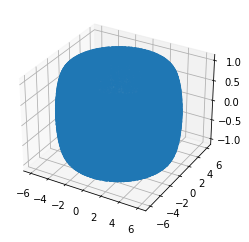

In [12]:
angles = np.linspace(0, 2*np.pi, 100)
theta, phi = np.meshgrid(angles, angles)
theta, phi = np.ravel(theta), np.ravel(phi)
theta += 0.01*np.random.randn(theta.shape[0])
phi += 0.01*np.random.randn(theta.shape[0])

r, R = 1, 5
X = np.stack([(r*np.cos(theta) + R)*np.cos(phi),
              (r*np.cos(theta) + R)*np.sin(phi),
              r*np.sin(theta)], axis=-1)

ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:, 1], X[:, 2],)

In [13]:
point = np.array([[6., 0., 0. ]])
epsilon = 0.6


In [14]:
st_sphere = build_local_complex(X, point, epsilon, dimensions=[0, 1, 2])
pd = get_persistence(st_sphere, [0, 1, 2])

pd

[(2, (0.34489622070248904, 0.4107444454256411)),
 (1, (0.0836782021578225, 0.30427498892284743)),
 (1, (0.11679193066501002, 0.23051425817666138)),
 (1, (0.16009464060377365, 0.27356437726218996)),
 (1, (0.16215936993921787, 0.21192716457113042)),
 (1, (0.17264968278953866, 0.21542586920078327)),
 (1, (0.230192825915085, 0.2641417660411533)),
 (1, (0.09892820939664951, 0.12934911204282387)),
 (1, (0.08451197877032553, 0.10978576861864664)),
 (1, (0.12170183736256274, 0.14087107946811223)),
 (1, (0.3178334156275827, 0.33568112414898027)),
 (1, (0.14593126724768285, 0.16159581896904157)),
 (1, (0.0810398740816363, 0.09520118656464593)),
 (1, (0.13757165583110342, 0.1507670471443201)),
 (1, (0.12115690420835684, 0.1242128298356864)),
 (1, (0.2394201024608096, 0.23953147025473912)),
 (0, (0.0, 0.14001723878246045)),
 (0, (0.0, 0.12440056103632473)),
 (0, (0.0, 0.1180661510827429)),
 (0, (0.0, 0.10537098860836533)),
 (0, (0.0, 0.10402374742482136)),
 (0, (0.0, 0.10190863010395589)),
 (0, (0

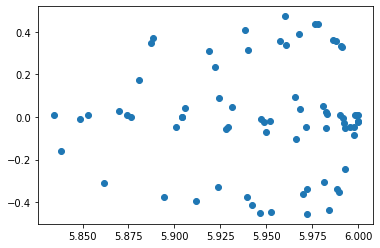

In [15]:
is_in_ball, _ = is_point_in_ball(X, point, epsilon)
x_l = X[is_in_ball]
_ = plt.scatter(x_l[:,0], x_l[:,1])

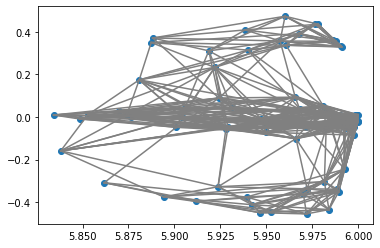

In [16]:
value = 0.30
simplices = [simplex
             for simplex, simplex_v in st_sphere.get_filtration() if (simplex_v <= value)&(len(simplex)==2)]
simplices

is_in_ball = is_point_in_ball(X, point, epsilon, return_distances=False)
X_local = X[is_in_ball]
plt.scatter(X_local[:, 0], X_local[:, 1])
star_vertex = X_local.shape[0]

for simplex in simplices:
    if simplex[1]!=star_vertex:
        i_a, i_b = simplex
        plt.plot([X_local[i_a][0], X_local[i_b][0]],
                 [X_local[i_a][1], X_local[i_b][1]], c='grey')